In [1]:
using Pkg
Pkg.activate("../..")

  Activating project at `~/Desktop/juliatokyo12`


In [2]:
mutable struct LCGPRNG
    seed::Int
    a::Int
    c::Int
    m::Int
end

function sample!(rng::LCGPRNG, n)
    result = Vector{Int64}(undef, n)
    prev = rng.seed
    for i in 1:n
        x = (rng.a * prev + rng.c) % rng.m
        result[i] = x
        prev = x
    end
    rng.seed = result[end]
    return result
end

sample! (generic function with 1 method)

In [3]:
seed = 1
a = 48271  
c = 0
m = 2^31 - 1 

prng = LCGPRNG(seed, a, c, m)

LCGPRNG(1, 48271, 0, 2147483647)

In [4]:
a = sample!(prng, 100)

100-element Vector{Int64}:
      48271
  182605794
 1291394886
 1914720637
 2078669041
  407355683
 1105902161
  854716505
  564586691
 1596680831
  192302371
 1203428207
 1250328747
          ⋮
  324062450
  547639202
 1715708819
 1273555394
 1925544752
  583514338
  425095546
  580853881
  851194519
  206008598
 1391748448
 1358404307

In [5]:
using Plots
theme(:ggplot2)

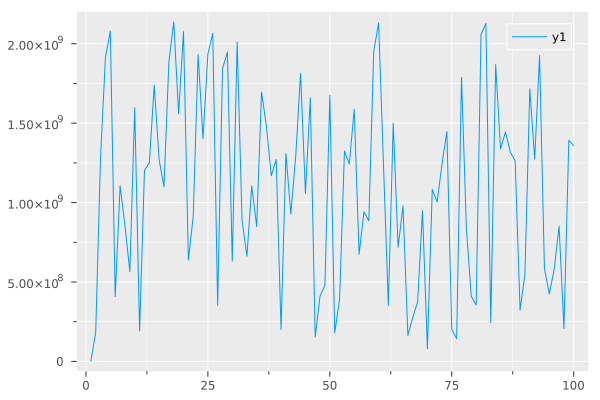

In [6]:
plot(a)

In [7]:
savefig("../../slides/img/lcg_sample.svg")

"/Users/yuchi/Desktop/juliatokyo12/slides/img/lcg_sample.svg"

In [8]:
using Random

device_rng = Random.RandomDevice()

RandomDevice()

In [9]:
using BenchmarkTools
N = 10^6

1000000

In [10]:
@benchmark sample!(prng, N)

BenchmarkTools.Trial: 1006 samples with 1 evaluation.
 Range (min … max):  4.508 ms …   8.796 ms  ┊ GC (min … max): 0.00% … 42.56%
 Time  (median):     4.850 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   4.962 ms ± 395.196 μs  ┊ GC (mean ± σ):  4.41% ±  5.59%

    ▁▆▂██▃▆▅▂▂▁▂▂  ▁                                           
  ▄██████████████▇██▇▆▇▇▆▆▇▅▅▃▄▄▃▂▃▃▃▄▃▄▄▃▂▃▃▃▂▂▂▃▂▃▂▃▂▂▂▂▂▁▃ ▄
  4.51 ms         Histogram: frequency by time        6.24 ms <

 Memory estimate: 7.63 MiB, allocs estimate: 3.

In [ ]:
@benchmark rand(device_rng, N)

In [ ]:
sample2d!(rng::LCGPRNG) = sample!(rng, 2) ./ rng.m
sample3d!(rng::LCGPRNG) = sample!(rng, 3) ./ rng.m

In [ ]:
function sample2d!(prng, n)
    x = Vector{Float64}(undef, n)
    y = Vector{Float64}(undef, n)

    for i in 1:n
        _x, _y = sample2d!(prng)
        x[i] = _x
        y[i] = _y
    end

    return x, y
end

In [ ]:
function sample3d!(prng, n)
    x = Vector{Float64}(undef, n)
    y = Vector{Float64}(undef, n)
    z = Vector{Float64}(undef, n)

    for i in 1:n
        _x, _y, _z = sample3d!(prng)
        x[i] = _x
        y[i] = _y
        z[i] = _z
    end

    return x, y, z
end

In [ ]:
seed = 1
a = 45
c = 1
m = 256

prng = LCGPRNG(seed, a, c, m)

In [ ]:
x, y = sample2d!(prng, 100)
scatter(x, y, label="")

In [ ]:
savefig("../../slides/img/lcg_lattice_2d.svg")

In [ ]:
vline!(x[10:20], color="grey", label=false)
hline!(y[10:20], color="grey", label=false)

In [ ]:
savefig("../../slides/img/lcg_lattice_2d_lined.svg")

In [ ]:
x, y, z = sample3d!(prng, 300)

In [ ]:
scatter(x, y, z, camera=(245, 20), background="#EBEBEB", shape=:s, xaxis=false, yaxis=false, label="")

In [ ]:
savefig("../../slides/img/lcg_lattice.svg")

In [ ]:
anim = Animation()

for θ in 30:10:390
    p = scatter(x, y, z, camera=(θ, 30), background="#EBEBEB", shape=:s, xaxis=false, yaxis=false, label="")
    frame(anim, p)
end 

gif(anim, "../../slides/img/lcg_lattice.gif", fps=5)

In [ ]:
seed = 12
a = 27
c = 1
m = 256

prng = LCGPRNG(seed, a, c, m)

x, y = sample2d!(prng, 100)

In [ ]:
scatter(x, y, label="")

In [ ]:
savefig("../../slides/img/lcg_lattice_dense.svg")

In [ ]:
# RANDU

seed = 1
a = 65539
c = 0
m = 2^31

prng = LCGPRNG(seed, a, c, m)

x, y, z = sample3d!(prng, 5000)

In [ ]:
scatter(x, y, z, camera=(145, 30), background="#EBEBEB", label="", alpha=0.3, size=(600,600))

In [ ]:
savefig("../../slides/img/lcg_randu.svg")